# Tutorial 3 - Graph Machine Learning Libraries

In this tutorial we will explore one of the popular Graph ML Libraries called _"Deep Graph Library"_ - https://www.dgl.ai/dgl_docs/

There are other options - like PyG (https://www.pyg.org).

We will try all three tasks of Graph ML
 1) Node Classification
 2) Graph Classification
 3) Link Prediction

## Installation


**HINT** If you want to keep your main python environment free from unnecessary clutter of libraries, I strongly advise to use  either Conda or Virtual Environments :).

If you decide to go with Conda (see https://docs.conda.io/en/latest/miniconda.html#latest-miniconda-installer-links) for installation instructions), first create an environment from terminal and activate it:
```
conda create -n gnn_t3 python=3.12
conda activate gnn_t3
```

And when you have your environment up and running, use following to install core dependancies:

```
pip3 install jupyter torch==2.4 pandas scikit-learn numpy pyvis      
```

DGL library has it's own installation guide on https://www.dgl.ai/pages/start.html .

On linux with CUDA, the installation can be done by running:
```
conda install -c dglteam/label/th24_cu124 dgl
```

On MAC OS you need to bild the package from source code and I'd just recommend to use Google Colab.


In [ ]:
! pip3 install torch==2.4 pandas scikit-learn numpy pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.4/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.4/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.4 MB/s eta 0:00:00
Discarding https://data.dgl.ai/wheels/torch-2.4/dgl-2.5.0-cp311-cp311-manylinux1_x86_64.whl (from https://data.dgl.ai/wheels/torch-2.4/repo.html): Requested dgl from https://data.dgl.ai/wheels/torch-2.4/dgl-2.5.0-cp311-cp311-manylinux1_x86_64.whl has inconsistent version: expected '2.5.0', but metadata has '2.5.0+cpu'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 8.5 MB/s eta 0:00:00


In [ ]:
import os
os.environ['DGLBACKEND'] = 'pytorch'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import dgl
import dgl.data as ddta
import dgl.nn as dnn

import numpy as np
import scipy.sparse as sp
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

import pyvis.network as pyv_n

import itertools

import matplotlib.pyplot as plt

# HOMEWORK

Create a notebook exploring one of the tasks shown above with a dataset directly available in DGL library. In your homework focus on experimenting with impact of vector representation convolution type/architecture and type of classifier on accuracy of the result. Document your finding with described and visualised results. Document behaviour/improvements of your architectures on specific examples.

In [ ]:
# load the Citeseer citation network dataset
dataset = dgl.data.CiteseerGraphDataset()
graph = dataset[0]

labels = graph.ndata['label']
train_mask = graph.ndata['train_mask']
val_mask = graph.ndata['val_mask']
test_mask = graph.ndata['test_mask']

/root/.dgl/citeseer.zip:   0%|          | 0.00/239k [00:00<?, ?B/s]

Extracting file to /root/.dgl/citeseer_d6836239
Finished data loading and preprocessing.
  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.


In [ ]:
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes, aggregator_type='mean', num_layers=2):
        super(GraphSAGE, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        if num_layers == 1:
            self.layers.append(dnn.SAGEConv(in_feats, num_classes, aggregator_type))
        else:
            self.layers.append(dnn.SAGEConv(in_feats, hidden_size, aggregator_type))
            for _ in range(num_layers - 2):
                self.layers.append(dnn.SAGEConv(hidden_size, hidden_size, aggregator_type))
            self.layers.append(dnn.SAGEConv(hidden_size, num_classes, aggregator_type))

    def forward(self, g, features):
        h = features
        for i in range(self.num_layers - 1):
            h = self.layers[i](g, h)
            h = F.relu(h)
        h = self.layers[-1](g, h)
        return h

# GAT model
class GATModel(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes, num_heads=4):
        super(GATModel, self).__init__()
        self.gat1 = dnn.GATConv(in_feats, hidden_size, num_heads)
        self.gat2 = dnn.GATConv(hidden_size * num_heads, num_classes, 1)

    def forward(self, g, features):
        h = self.gat1(g, features)
        h = h.flatten(1)
        h = F.elu(h)
        h = self.gat2(g, h)
        h = h.mean(1)
        return h

In [ ]:
def evaluate_model(model, graph, attributes, labels, test_mask):
    model.eval()
    with torch.no_grad():
        probabilities = model(graph, attributes)
        predictions = probabilities.argmax(1)
        acc = (predictions[test_mask] == labels[test_mask]).float().mean().item()
    return acc

def train_and_evaluate(model, g, features, labels, train_mask, val_mask, test_mask, epochs=50, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_accuracies, val_accuracies, test_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        logits = model(g, features)
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_acc = evaluate_model(model, g, features, labels, train_mask)
        val_acc = evaluate_model(model, g, features, labels, val_mask)
        test_acc = evaluate_model(model, g, features, labels, test_mask)

        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        test_accuracies.append(test_acc)

    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Validation Acc')
    plt.plot(test_accuracies, label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_accuracies[-1], test_accuracies[-1], val_accuracies[-1]

In [ ]:
features = graph.ndata['feat']

Training GraphSAGE with aggregator 'mean' and 2 layers


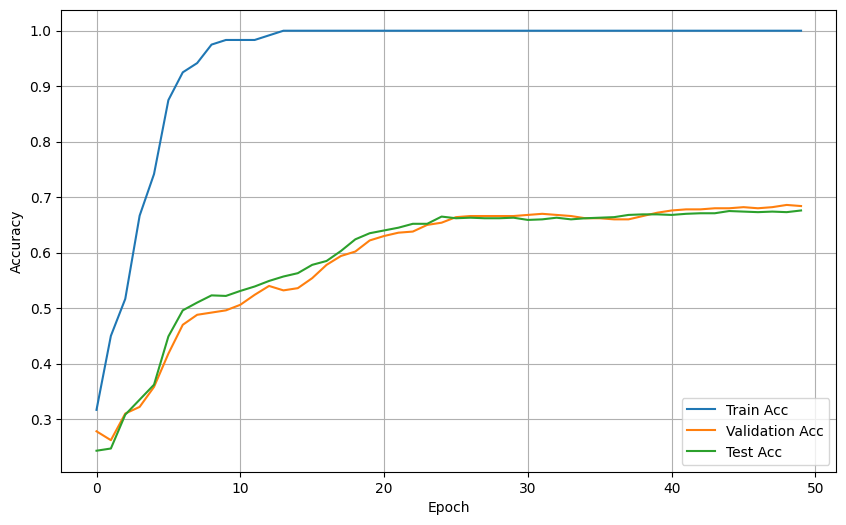

Training GraphSAGE with aggregator 'gcn' and 2 layers


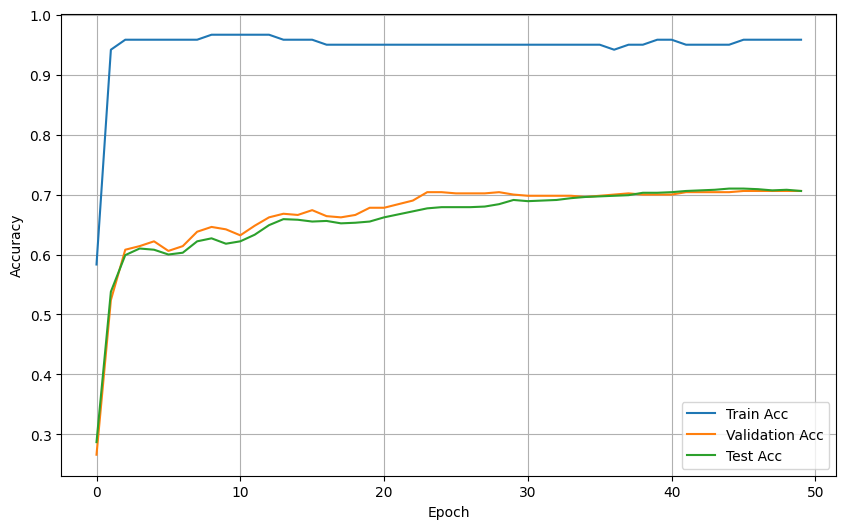

Training GraphSAGE with aggregator 'pool' and 2 layers


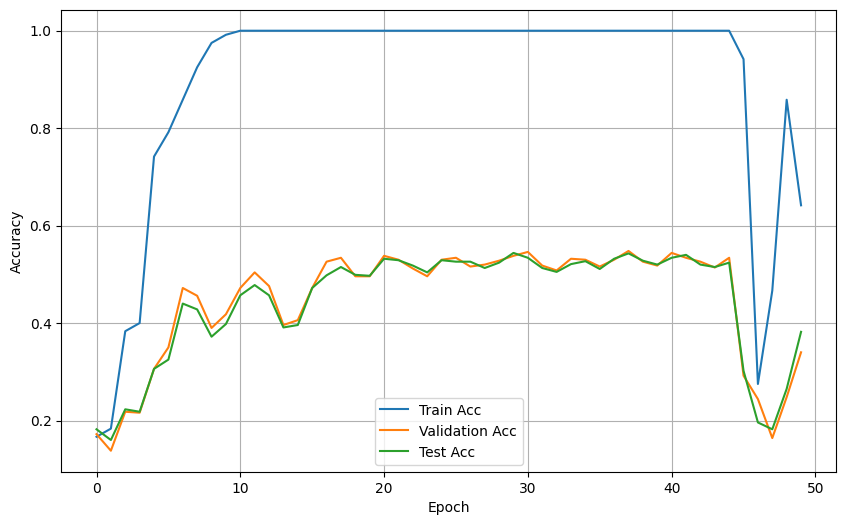

In [ ]:
# Experiment 1: Different Aggregators
aggregator_combinations = [('mean', 2), ('gcn', 2), ('pool', 2)]
aggregator_results = []

for agg, layers in aggregator_combinations:
    print(f"Training GraphSAGE with aggregator '{agg}' and {layers} layers")
    model = GraphSAGE(in_feats=features.shape[1], hidden_size=16, num_classes=dataset.num_classes, aggregator_type=agg, num_layers=layers)
    results = train_and_evaluate(model, graph, features, labels, train_mask, val_mask, test_mask)
    aggregator_results.append((agg, layers, results))


Training GraphSAGE with 1 layers


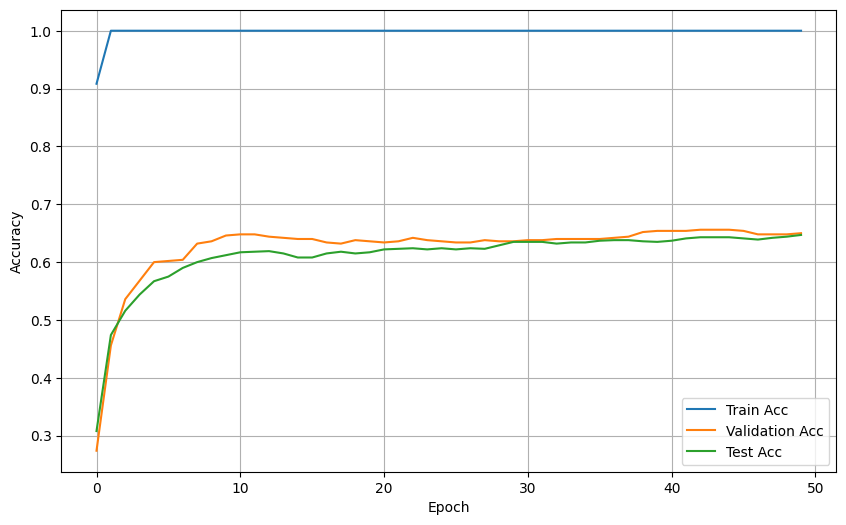

Training GraphSAGE with 2 layers


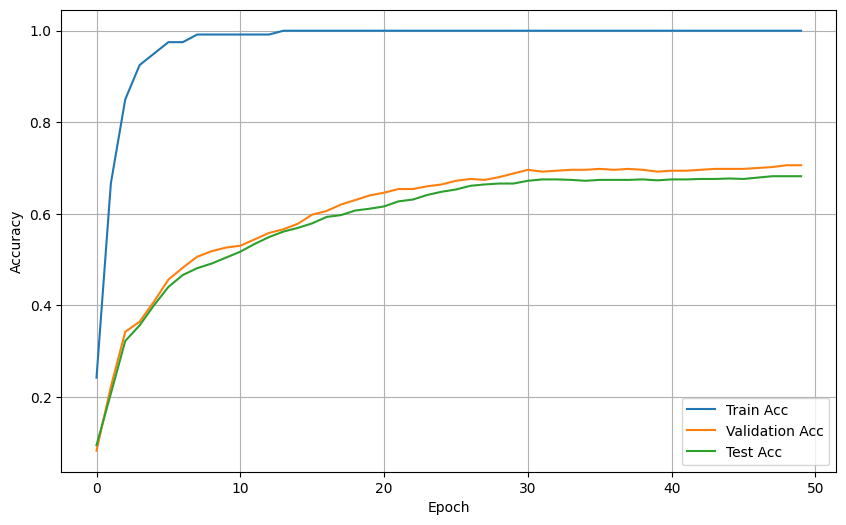

Training GraphSAGE with 3 layers


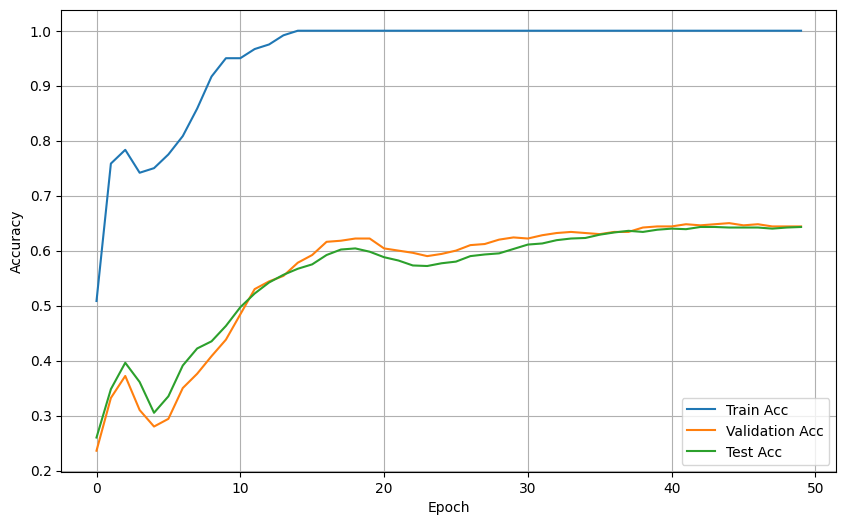

In [ ]:
# Experiment 2: Different Layer Numbers
layer_configs = [1, 2, 3]
layer_results = []

for layers in layer_configs:
    print(f"Training GraphSAGE with {layers} layers")
    model = GraphSAGE(in_feats=features.shape[1], hidden_size=16, num_classes=dataset.num_classes, aggregator_type='mean', num_layers=layers)
    results = train_and_evaluate(model, graph, features, labels, train_mask, val_mask, test_mask)
    layer_results.append((layers, results))

Training GraphSAGE with hidden size 8


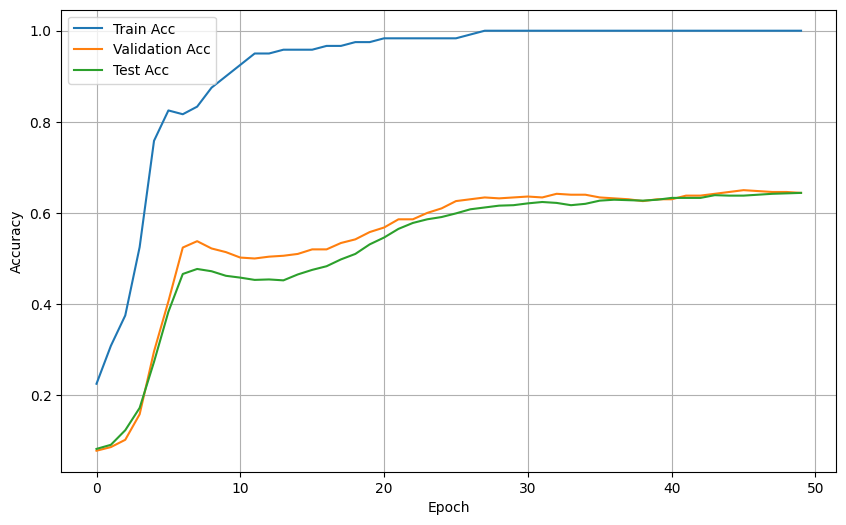

Training GraphSAGE with hidden size 16


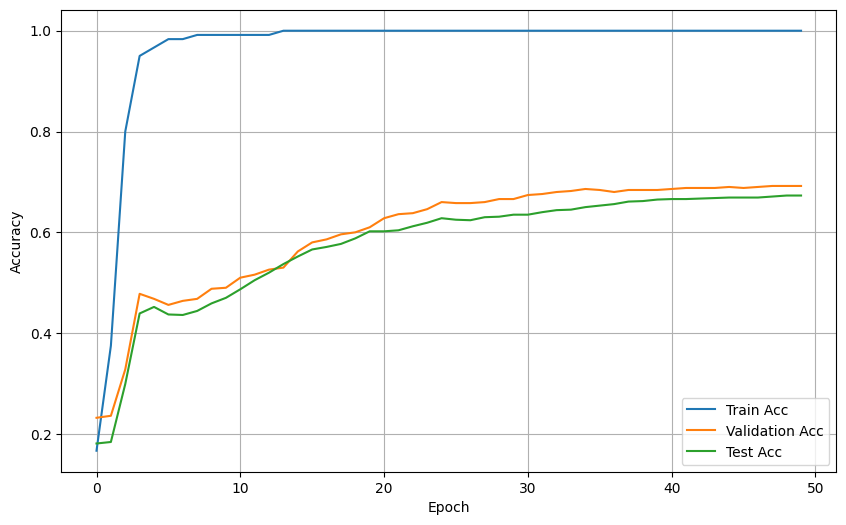

Training GraphSAGE with hidden size 32


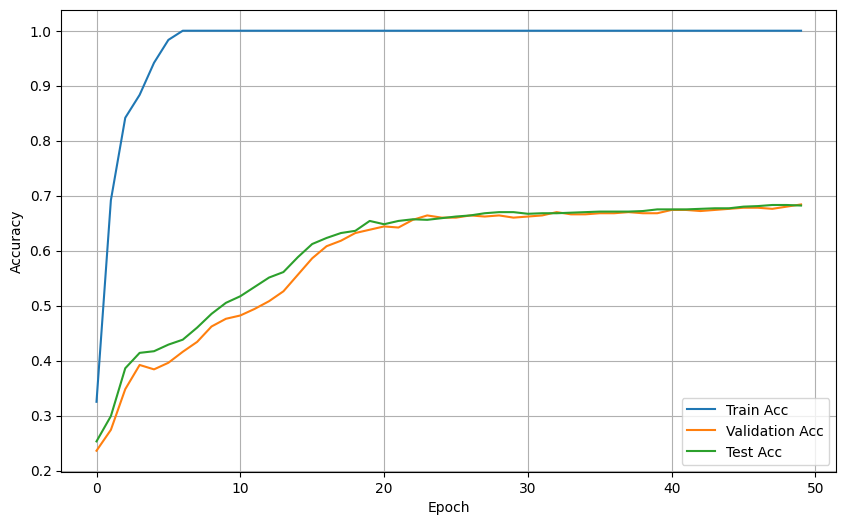

Training GraphSAGE with hidden size 64


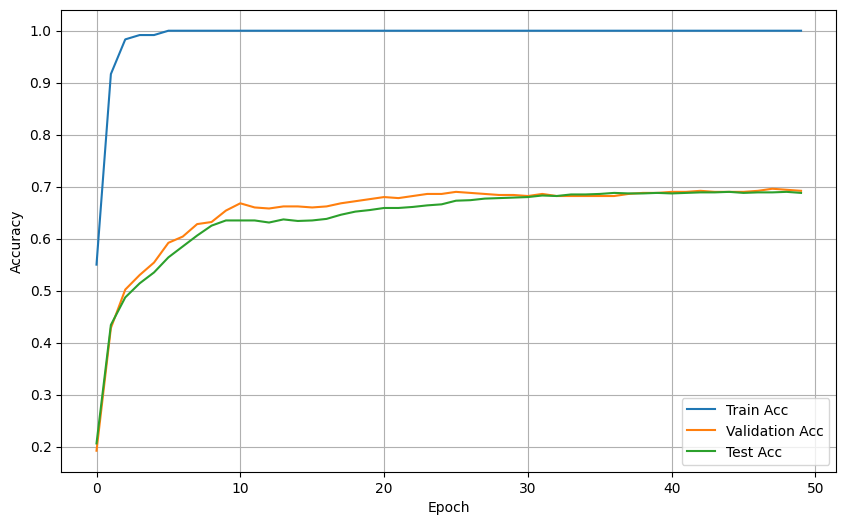

In [ ]:
# Experiment 3: Hidden Dimensions
hidden_sizes = [8, 16, 32, 64]
hidden_results = []

for hidden_size in hidden_sizes:
    print(f"Training GraphSAGE with hidden size {hidden_size}")
    model = GraphSAGE(in_feats=features.shape[1], hidden_size=hidden_size, num_classes=dataset.num_classes, aggregator_type='mean', num_layers=2)
    results = train_and_evaluate(model, graph, features, labels, train_mask, val_mask, test_mask)
    hidden_results.append((hidden_size, results))


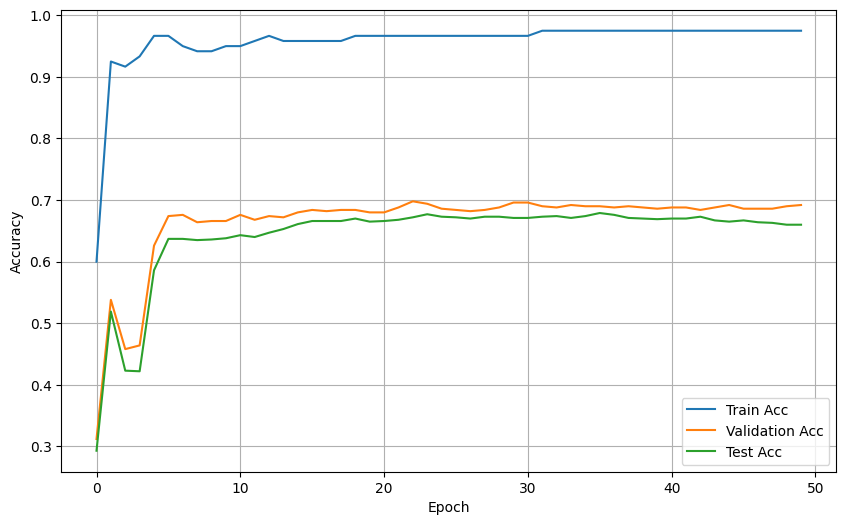

In [ ]:
# Experiment 4: GAT
gat_model = GATModel(in_feats=features.shape[1], hidden_size=8, num_classes=dataset.num_classes, num_heads=4)
gat_results = train_and_evaluate(gat_model, graph, features, labels, train_mask, val_mask, test_mask)

In [ ]:
print("Aggregator Type Results:")
for agg, layers, result in aggregator_results:
    print(f"Aggregator: {agg} (2 layers), train: {result[0]:.4f}, validation: {result[1]:.4f}, test: {result[2]:.4f}")

print("Layer Number Results:")
for layers, result in layer_results:
    print(f"layers: {layers}, train: {result[0]:.4f}, validation: {result[1]:.4f}, test: {result[2]:.4f}")

print("Hidden Size Results:")
for hidden_size, result in hidden_results:
    print(f"hidden size: {hidden_size}, train: {result[0]:.4f}, validation: {result[1]:.4f}, test: {result[2]:.4f}")

print("GAT Results:")
print(f", train: {result[0]:.4f}, validation: {result[1]:.4f}, test: {result[2]:.4f}")

Aggregator Type Results:
Aggregator: mean (2 layers), train: 1.0000, validation: 0.6760, test: 0.6840
Aggregator: gcn (2 layers), train: 0.9583, validation: 0.7060, test: 0.7060
Aggregator: pool (2 layers), train: 0.6417, validation: 0.3820, test: 0.3400
Layer Number Results:
layers: 1, train: 1.0000, validation: 0.6470, test: 0.6500
layers: 2, train: 1.0000, validation: 0.6820, test: 0.7060
layers: 3, train: 1.0000, validation: 0.6430, test: 0.6440
Hidden Size Results:
hidden size: 8, train: 1.0000, validation: 0.6440, test: 0.6440
hidden size: 16, train: 1.0000, validation: 0.6730, test: 0.6920
hidden size: 32, train: 1.0000, validation: 0.6820, test: 0.6840
hidden size: 64, train: 1.0000, validation: 0.6880, test: 0.6920
GAT Results:
, train: 1.0000, validation: 0.6880, test: 0.6920


In [ ]:
# both mean and gcn aggregations worked really well while pool aggregation lowred the test accuracy significantly.
# the amount of layers didnt make much difference, probably meaning that even a simple model can understand the patterns in the dataset
# from analyzing the different hidden sizes, i will conlude that a bigger hidden size improves the model by a few percentage point and it will be worth while to increase this paramer in order to get improved results
# using the GAT did not same to improve the model